In [1]:
import gym
import numpy as np

### Search for best weights using random guesses...

In [4]:
env = gym.make('CartPole-v0')

In [5]:
def random_weight_sampling(epochs, num_iter, max_run_steps):
    # initialize collection & weights
    avg_run_length = 0
    avg_run_length_collection = []
    best_weights = np.zeros((4))
    
    # Run epochs
    for epoch in range(epochs):
        # Random weight guess
        weights = np.random.random(4)
        
        # Test weights over num_iter runs
        run_lengths = []
        for i in range(num_iter):
            observation = env.reset()
            counter = 0
            done = False
            while not done and counter < max_run_steps:
                # env.render()
                action = int(np.dot(observation, weights) > 0)  # chose action 0 or 1
                observation, reward, done, _ = env.step(action)
                counter += 1
            
            run_lengths.append(counter)
            
        avg_run_length_collection.append(np.mean(run_lengths))  
        
        # Check if run length was better than best run so far
        if np.mean(run_lengths) > avg_run_length:
            avg_run_length = np.mean(run_lengths)
            best_weights = weights
            print("Epoch ", epoch, " --- update weights! Avg. run length was: ", np.mean(run_lengths))
        else:
            print("Epoch ", epoch, ". Avg. run length was: ", np.mean(run_lengths))

    return avg_run_length_collection, best_weights

In [6]:
collection, best_weights = random_weight_sampling(100, 100, 1000)

Epoch  0  --- update weights! Avg. run length was:  200.0
Epoch  1 . Avg. run length was:  200.0
Epoch  2 . Avg. run length was:  78.76
Epoch  3 . Avg. run length was:  9.56
Epoch  4 . Avg. run length was:  9.36
Epoch  5 . Avg. run length was:  9.41
Epoch  6 . Avg. run length was:  112.03
Epoch  7 . Avg. run length was:  79.34
Epoch  8 . Avg. run length was:  10.11
Epoch  9 . Avg. run length was:  121.58
Epoch  10 . Avg. run length was:  9.81
Epoch  11 . Avg. run length was:  9.48
Epoch  12 . Avg. run length was:  191.37
Epoch  13 . Avg. run length was:  153.86
Epoch  14 . Avg. run length was:  9.46
Epoch  15 . Avg. run length was:  185.55
Epoch  16 . Avg. run length was:  200.0
Epoch  17 . Avg. run length was:  28.29
Epoch  18 . Avg. run length was:  13.57
Epoch  19 . Avg. run length was:  200.0
Epoch  20 . Avg. run length was:  199.62
Epoch  21 . Avg. run length was:  9.6
Epoch  22 . Avg. run length was:  154.18
Epoch  23 . Avg. run length was:  9.46
Epoch  24 . Avg. run length was: 

In [7]:
print(best_weights)

[0.14643312 0.44598841 0.85764216 0.58532553]


In [8]:
import matplotlib.pyplot as plt
from IPython import display
%matplotlib inline

env = gym.make('CartPole-v0')


In [9]:
def single_run(weights, max_run_steps):

    observation = env.reset()
    counter = 0
    done = False
    while not done and counter < max_run_steps:
        #env.render()
        plt.imshow(env.render(mode='rgb_array'))
        display.display(plt.gcf())    
        display.clear_output(wait=True)
        action = int(np.dot(observation, weights) > 0)  # chose action 0 or 1
        observation, reward, done, _ = env.step(action)
        counter += 1
    env.close()

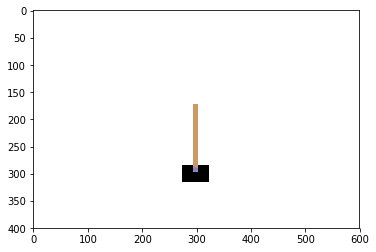

In [10]:
single_run([0.2, 0.2, 0.2, 0.2], 50)